In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [279]:
df = pd.read_csv('data1.csv')
df

,x,y
0,1.0,1.0
1,1.0,0.9
2,0.9,1.0
3,1.0,-1.0
4,0.9,-1.0
5,1.0,-0.9
6,-1.0,1.0
7,-0.9,1.0
8,-1.0,0.9
9,-1.0,-1.0


In [280]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['x','y']])
y_predicted

array([1, 1, 1, 0, 0, 0, 2, 2, 2, 3, 3, 3, 1])

In [281]:
df['cluster']=y_predicted
df

,x,y,cluster
0,1.0,1.0,1
1,1.0,0.9,1
2,0.9,1.0,1
3,1.0,-1.0,0
4,0.9,-1.0,0
5,1.0,-0.9,0
6,-1.0,1.0,2
7,-0.9,1.0,2
8,-1.0,0.9,2
9,-1.0,-1.0,3


No handles with labels found to put in legend.


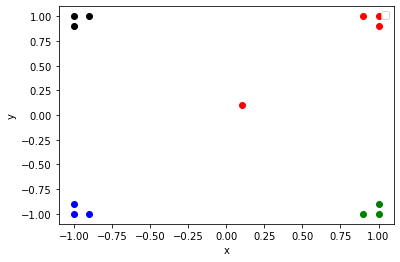

In [282]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.x,df1.y,color='green')
plt.scatter(df2.x,df2.y,color='red')
plt.scatter(df3.x,df3.y,color='black')
plt.scatter(df4.x,df4.y,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [283]:
dist = pd.DataFrame()

dist1=np.zeros(13)
dist2=np.zeros(13)
dist3=np.zeros(13)
dist4=np.zeros(13)

for i in range(0,13):
    dist1[i] = sqrt((df['x'][0]-df['x'][i])**2 + (df['y'][0]-df['y'][i])**2)
    print(dist1)
print("\n")
for i in range(0,13):
    dist2[i] = sqrt((df['x'][3]-df['x'][i])**2 + (df['y'][3]-df['y'][i])**2)
    print(dist2)
print("\n")
for i in range(0,13):
    dist3[i] = sqrt((df['x'][6]-df['x'][i])**2 + (df['y'][6]-df['y'][i])**2)
    print(dist3)
print("\n")
for i in range(0,13):
    dist4[i] = sqrt((df['x'][9]-df['x'][i])**2 + (df['y'][9]-df['y'][i])**2)
    print(dist4)
print("\n")

dist['c1'] = pd.Series(dist1)
dist['c2'] = pd.Series(dist2)
dist['c3'] = pd.Series(dist3)
dist['c4'] = pd.Series(dist4)
clusters=dist.idxmax(axis=1)
print(dist,"\n", clusters)

clust1=clusters.index[clusters=='c1'].tolist()
clust2=clusters.index[clusters=='c2'].tolist()
clust3=clusters.index[clusters=='c3'].tolist()
clust4=clusters.index[clusters=='c4'].tolist()
print("Cluster 1: ",clust1,"\nCluster 2: ",clust2,"\nCluster 3: ",clust3,"\nCluster 4: ",clust4)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.1 0.1 2.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.         0.1        0.1        2.         2.00249844 0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.         0.1        0.1        2.         2.00249844 1.9
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.         0.1        0.1        2.         2.00249844 1.9
 2.         0.         0.         0.         0.         0.
 0.        ]
[0.         0.1        0.1        2.         2.00249844 1.9
 2.         1.9        0.         0.         0.         0.
 0.        ]
[0.         0.1        0.1        2.         2.00249844 1.9
 2.         1.9        2.00249844 0.         0.         0.
 0.        ]
[0.         0.1        0.1        2.         2.00249844 1.9
 2.         1.9        2.00249844 2.82842712 0.         0.
 0.        ]
[0.   

In [284]:
clusters

0     c4
1     c4
2     c4
3     c3
4     c3
5     c3
6     c2
7     c2
8     c2
9     c1
10    c1
11    c1
12    c4
dtype: object

In [285]:
coord_clust1 = df.iloc[0:3,].mean(axis=0)
coord_clust2 = df.iloc[3:6,].mean(axis=0)
coord_clust3 = df.iloc[6:9,].mean(axis=0)
coord_clust4 = df.iloc[9:13,].mean(axis=0)
print("New coordinates for cluster 1: \n",coord_clust1)
print("New coordinates for cluster 2: \n",coord_clust2)
print("New coordinates for cluster 3: \n",coord_clust3)
print("New coordinates for cluster 4: \n",coord_clust4)
coord_clust1['x']

New coordinates for cluster 1: 
 x          0.966667
y          0.966667
cluster    1.000000
dtype: float64
New coordinates for cluster 2: 
 x          0.966667
y         -0.966667
cluster    0.000000
dtype: float64
New coordinates for cluster 3: 
 x         -0.966667
y          0.966667
cluster    2.000000
dtype: float64
New coordinates for cluster 4: 
 x         -0.7
y         -0.7
cluster    2.5
dtype: float64


0.9666666666666667

In [286]:
dist = pd.DataFrame()

dist1=np.zeros(13)
dist2=np.zeros(13)
dist3=np.zeros(13)
dist4=np.zeros(13)

coord_clust1['x']=df['x'][0]
coord_clust1['y']=df['y'][0]
coord_clust2['x']=df['x'][3]
coord_clust2['y']=df['y'][3]
coord_clust3['x']=df['x'][6]
coord_clust3['y']=df['y'][6]
coord_clust4['x']=df['x'][9]
coord_clust4['y']=df['y'][9]

for j in range(0,1):
    print("K-means iteration: ", j)
    for i in range(0,13):
        dist1[i] = sqrt((coord_clust1['x']-df['x'][i])**2 + (coord_clust1['y']-df['y'][i])**2)
        print(dist1)
    print("\n")
    for i in range(0,13):
        dist2[i] = sqrt((coord_clust2['x']-df['x'][i])**2 + (coord_clust2['y']-df['y'][i])**2)
        print(dist2)
    print("\n")
    for i in range(0,13):
        dist3[i] = sqrt((coord_clust3['x']-df['x'][i])**2 + (coord_clust1['y']-df['y'][i])**2)
        print(dist3)
    print("\n")
    for i in range(0,13):
        dist4[i] = sqrt((coord_clust4['x']-df['x'][i])**2 + (coord_clust2['y']-df['y'][i])**2)
        print(dist4)
    print("\n")
    
    dist['c1'] = pd.Series(dist1)
    dist['c2'] = pd.Series(dist2)
    dist['c3'] = pd.Series(dist3)
    dist['c4'] = pd.Series(dist4)
    clusters=dist.idxmax(axis=1)
    print(dist,"\n", clusters)
    
    clust1=clusters.index[clusters=='c1'].tolist()
    clust2=clusters.index[clusters=='c2'].tolist()
    clust3=clusters.index[clusters=='c3'].tolist()
    clust4=clusters.index[clusters=='c4'].tolist()
    print("Cluster 1: ",clust1,"\nCluster 2: ",clust3,"\nCluster 3: ",clust3,"\nCluster 4: ",clust4)
    
    coord_clust1 = df.iloc[clust1,].mean(axis=0)
    coord_clust2 = df.iloc[clust2,].mean(axis=0)
    coord_clust3 = df.iloc[clust3,].mean(axis=0)
    coord_clust4 = df.iloc[clust4,].mean(axis=0)
    
    print("New coordinates for cluster 1: \n",coord_clust1)
    print("New coordinates for cluster 2: \n",coord_clust2)
    print("New coordinates for cluster 3: \n",coord_clust3)
    print("New coordinates for cluster 4: \n",coord_clust4)
    coord_clust1['x']

K-means iteration:  0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.1 0.1 2.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.         0.1        0.1        2.         2.00249844 0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.         0.1        0.1        2.         2.00249844 1.9
 0.         0.         0.         0.         0.         0.
 0.        ]
[0.         0.1        0.1        2.         2.00249844 1.9
 2.         0.         0.         0.         0.         0.
 0.        ]
[0.         0.1        0.1        2.         2.00249844 1.9
 2.         1.9        0.         0.         0.         0.
 0.        ]
[0.         0.1        0.1        2.         2.00249844 1.9
 2.         1.9        2.00249844 0.         0.         0.
 0.        ]
[0.         0.1        0.1        2.         2.00249844 1.9
 2.         1.9        2.00249844 2.82842712 0.         

In [287]:
coord_clust1 = df.iloc[0:3,].mean(axis=0)
coord_clust2 = df.iloc[3:6,].mean(axis=0)
coord_clust3 = df.iloc[6:9,].mean(axis=0)
coord_clust4 = df.iloc[9:13,].mean(axis=0)
print("New coordinates for cluster 1: \n",coord_clust1)
print("New coordinates for cluster 2: \n",coord_clust2)
print("New coordinates for cluster 3: \n",coord_clust3)
print("New coordinates for cluster 4: \n",coord_clust4)
coord_clust1['x']

New coordinates for cluster 1: 
 x          0.966667
y          0.966667
cluster    1.000000
dtype: float64
New coordinates for cluster 2: 
 x          0.966667
y         -0.966667
cluster    0.000000
dtype: float64
New coordinates for cluster 3: 
 x         -0.966667
y          0.966667
cluster    2.000000
dtype: float64
New coordinates for cluster 4: 
 x         -0.7
y         -0.7
cluster    2.5
dtype: float64


0.9666666666666667

In [288]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>